# Homework 5: Problems with Equality Constraints

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from func import Func

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

## Exercise 1

<img src="figures/homework-05/exercise-1.png" width="600" />


In [2]:
def create_f1():
    x, y = sy.symbols('x, y')
    f = x + y**2
    h = 2*x**2 + y**2 - 1
    return Func(f, (x, y), constraints=[h])
f1 = create_f1()
f1

⎡     2⎤
⎣x + y ⎦

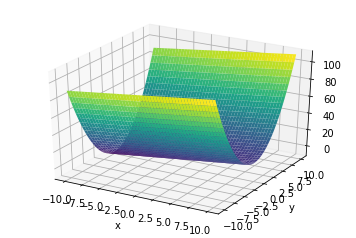

In [3]:
f1.plot()

In [4]:
points, lambdas = f1.solve_lagrangian()
points

In [5]:
f1.evalf(points)

Evaluting f(1/4, -sqrt(14)/4) = 1.12500000000000
Evaluting f(1/4, sqrt(14)/4) = 1.12500000000000
Evaluting f(-sqrt(2)/2, 0) = -0.707106781186548
Evaluting f(sqrt(2)/2, 0) = 0.707106781186548


---
## Exercise 2

<img src="figures/homework-05/exercise-2.png" width="600" />


In [6]:
def create_f2():
    x, y = sy.symbols('x, y')
    f = 2*x**2 + 3*y**2 + 1
    h = 4*x**2 + y**2 - 4
    return Func(f, (x, y), constraints=[h])
f2 = create_f2()
f2

⎡   2      2    ⎤
⎣2⋅x  + 3⋅y  + 1⎦

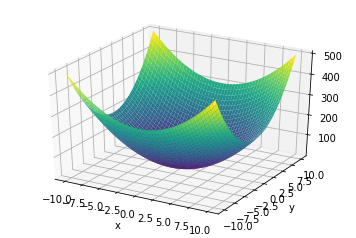

In [7]:
f2.plot()

In [8]:
points, lambdas = f2.solve_lagrangian()
points

In [9]:
f2.evalf(points)

Evaluting f(-1, 0) = 3.00000000000000
Evaluting f(0, -2) = 13.0000000000000
Evaluting f(0, 2) = 13.0000000000000
Evaluting f(1, 0) = 3.00000000000000


---
## Exercise 20.2 a)

<img src="figures/homework-05/exercise-20.2-a.png" width="600" />


---
## Exercise 20.2 b)

<img src="figures/homework-05/exercise-20.2-b.png" width="600" />


In [10]:
def create_f202b():
    x1, x2 = sy.symbols('x1, x2')
    f = 4*x1  +  x2**2
    h = x1**2 +  x2**2 - 9
    return Func(f, (x1, x2), constraints=[h])
f202b = create_f202b()
f202b

⎡         2⎤
⎣4⋅x₁ + x₂ ⎦

In [11]:
points, lambdas = f202b.solve_lagrangian()
points

In [12]:
f202b.evalf(points)

Evaluting f(-3, 0) = -12.0000000000000
Evaluting f(3, 0) = 12.0000000000000
Evaluting f(2, sqrt(5)) = 13.0000000000000
Evaluting f(2, -sqrt(5)) = 13.0000000000000


---
## Exercise 20.2 c)

<img src="figures/homework-05/exercise-20.2-c.png" width="600" />


In [13]:
def create_f202c():
    x1, x2 = sy.symbols('x1, x2')
    f = x1*x2
    h = x1**2 +  4*x2**2 - 1
    return Func(f, (x1, x2), constraints=[h])
f202c = create_f202c()
f202c

[x₁⋅x₂]

In [14]:
points, lambdas = f202c.solve_lagrangian()
points

In [15]:
f202c.evalf(points)

Evaluting f(-sqrt(2)/2, -sqrt(2)/4) = 0.250000000000000
Evaluting f(-sqrt(2)/2, sqrt(2)/4) = -0.250000000000000
Evaluting f(sqrt(2)/2, -sqrt(2)/4) = -0.250000000000000
Evaluting f(sqrt(2)/2, sqrt(2)/4) = 0.250000000000000


---
## Exercise 20.6 a)

<img src="figures/homework-05/exercise-20.6.png" width="600" />



<img src="figures/homework-05/exercise-20.6-a.png" width="600" />


To derive the Lagrange condition, we need to look up the Langrange's Theorem:

<img src="figures/lecture-05/theorem-20.2.png" width="600" />



Next, we need to define our objective function $f$ and the constraint $h$. To minimise the surface area of the box with the sides $a, b$ and $c$, we need an objective function that computes the total surface area:

$$
f(x) = 2ab + 2ac + 2bc
$$

where $x = [a, b, c]^T$. The box must have a volume $V > 0$ i.e., $V = abc$. Therefore, our constraint function can be defined as follows:

$$
h(x) = abc - V
$$



In [16]:
def create_f206():
    a, b, c, V = sy.symbols('a, b, c, V')
    f = 2*a*b  +  2*a*c  +  2*b*c
    h = a*b*c - V
    return Func(f, (a, b, c), constraints=[h])
f206 = create_f206()
f206

[2⋅a⋅b + 2⋅a⋅c + 2⋅b⋅c]

First, we find the gradient of $f$:

In [17]:
f206.gradient()

[2⋅b + 2⋅c  2⋅a + 2⋅c  2⋅a + 2⋅b]

Next, we find the gradient of $h$

In [18]:
H = sy.Matrix(f206._constraints)
DH = H.jacobian(f206._x)
DH

[b⋅c  a⋅c  a⋅b]

Now, we can formulate Lagrange's condition. The dimensions of the box with minimum surface area satisfies:

\begin{align}
2b + 2c + \lambda(bc) &= 0 \\
2a + 2c + \lambda(ac) &= 0 \\
2a + 2b + \lambda(ab) &= 0 \\
abc &= V \\
\end{align}

---
## Exercise 20.6 c)

<img src="figures/homework-05/exercise-20.6-c.png" width="600" />



1. Multiplying equation 1 by $a$, we get: $2ab + 2ac + \lambda abc = 0$
2. Multiplying equation 2 by $b$, we get: $2ab + 2bc + \lambda abc = 0$
3. Setting these two equations together, we get: $ac=bc $ or $c(a-b) = 0$
4. We know that $c \neq 0$. Why? Suppose $c=0$ then $V=0$ as $V=abc$. Since $V$ must be greater than zero, we know that $c \neq 0$. This means that the equation $c(a-b) = 0$ implies that $a=b$. The only way that the equation can be true is if $a=b$.
5. Multiplying equation 2 by $b$, we get: $2ab + 2bc + \lambda abc = 0$
6. Multiplying equation 3 by $c$, we get: $2ac + 2bc + \lambda abc = 0$
7. Setting these two equations together, we get: $ab=ac $ or $a(b-c) = 0$.
8. Again $a \neq 0$ because $V=abc > 0$. Therefore, $b=c$.
9. Now, we know that $a=b$ and $b=c$, or $a=b=c$ In equation 4, we make following substitutions:
  - Substituting $c=b$, we get $abb=V$
  - Substituting $b=a$, we get $a^3=V$
10. Finally, we just need to find what $a$ is: $a = b = c V^{1/3}$.

We can also use the solver to find the answer:

In [19]:
points, lambdas = f206.solve_lagrangian()

In [20]:
points

The solver finds three points. However, we can ignore the last two points which contain the imaginary numbers.

In [21]:
lambdas